# **Data Analysis Project: House Rocket**
 
## Fictional context
 
**Disclaimer: the context I will present here is not real. The company and the CEO only exist on my mind.**
 
*House Rocket* is a digital platform that buys and sells houses using technology. I am a data scientist hired by the CEO to maximize the profit using data science. My main strategy is buy good houses in good locations for a lower price and sell for a higher price.
 
# Strategy
 
   --- Understanding the problem:
 
      1.0. What are the houses the CEO should buy and at what price?
 
      2.0. Once the CEO bought the house what is the best moment to sell and at what price?
 
      3.0. Should the company renovate the house? What are the reforms that should be made? How much does each reform increases in the price?
 
   --- Proposes of solution:
 
      1.0. Table: House | Purchase price -> Data Analysis
 
      2.0. Table: House | Selling price -> Machine Learning model
 
      3.0. Table: House | Should be renovated (True or False)?
 
           Table: How much does each variable influence the price (correlation index, percentage or raw values)?
 
   --- Cycles:
 
      C1. Initial pipeline
 
      C2. Data cleaning
 
      C3. Feature engineering
 
      C4. Create hyphotesis to refute or validate in data analysis
 
          --- H1. Greater the number of bedrooms greater the price
          --- H2. Greater the number of bathrooms greater the price
          --- H3. Greater the squarfeet living greater the price
          --- H4. Greater the squarefeet lot greater the price
          --- H5. Waterfront houses are more expansive
          --- H6. Greater the number of floors greater the price
          --- H7. Houses with basement are more expensive
          --- H8. Houses are more expansive than studios and apartments
          --- H9. Renovated houses are more expansive
          --- H10. Older houses are cheaper
          --- H11. Prices do not change over month days
          --- H12. Prices change over months
          --- H13. Prices do not change over years
          --- H14. Houses in the center are more expansive
          
 
      C5. Data analysis
 
      C6. Train the model

# 0.0. Preparation

# 0.1. Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
%matplotlib inline

## 0.2. Loading data

In [ ]:
df = pd.read_csv("/content/kc_house_data (1).csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


## 0.3. Helper functions

In [ ]:
def addlabels(x, y):
   for i in range(len(x)):
      plt.text(round(i), y[i]//2, y[i], ha = "center", color = "black", fontsize = 10)
 
def bar_config():
   ax.spines["bottom"].set_visible(False)
   ax.spines["top"].set_visible(False)
   ax.spines["right"].set_visible(False)
   ax.spines["left"].set_visible(False)
   ax.tick_params(labelsize = 15)
   return None
 
def cross_validation(estimator):
 
   global norm_x, y
 
   maes = []
 
   for i in range(10):
      
      kfold = KFold(n_splits = 5, shuffle = True, random_state = i)
 
      for train_index, test_index in kfold.split(norm_x, y.values):
 
         trainX, trainY = norm_x[train_index], y.values[train_index]
         testX, testY = norm_x[test_index], y.values[test_index]
  
         model = estimator
         model.fit(trainX, trainY)
    
         p = model.predict(testX)
 
         mae = mean_absolute_error(y_true = testY, y_pred = p)
         maes.append(mae)
      
   return np.mean(maes)

# 1.0. Data Cleaning
 
This section is focused on treating the dataset.

## 1.1. Data Types

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 1.1.1. Changing types and sorting

In [ ]:
df.date = pd.to_datetime(df.date)
df.sort_values(by = "date", inplace = True)

## 1.2. Rounding variables

In [ ]:
df["floors"] = round(df["floors"])
df["bathrooms"] = round(df["bathrooms"])

## 1.3. Treating duplicates

In [ ]:
df.drop_duplicates(inplace = True)

## 1.4. Treating missing values

In [ ]:
print("Variable | Number of missing values")
df.isnull().sum()

Variable | Number of missing values


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.5. Treating outliers

All natural outliers

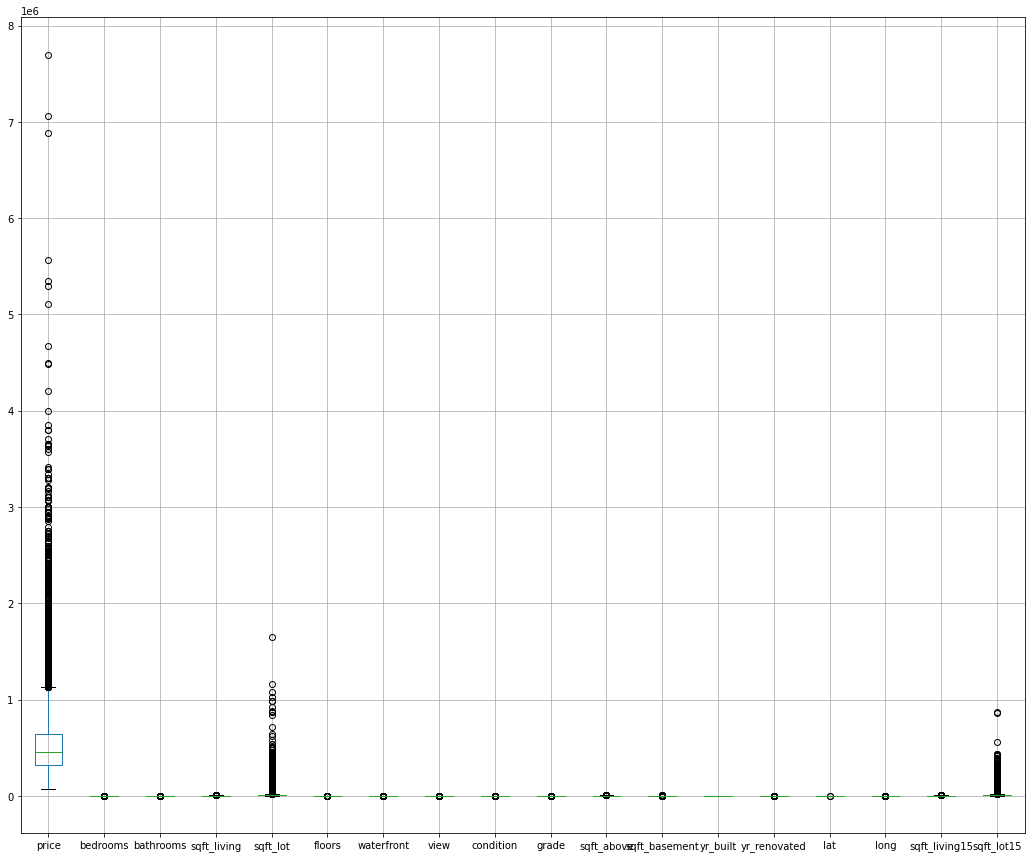

In [ ]:
df.drop(["id", "zipcode"], axis = 1).boxplot(figsize = (18, 15));

# 2.0. Data Analysis

This section is focused on knowing more about the data and verifying hyphotesis.

## 2.1. Feature Engineering

In [ ]:
house_type = []
 
for i in range(df.shape[0]):
   if df["bedrooms"][i] <= 1:
      house_type.append("studio")
   elif df["bedrooms"][i] == 2:
      house_type.append("apartment")
   else:
      house_type.append("house")
 
df["house_type"] = house_type

In [ ]:
renovated = []
 
for i in range(df.shape[0]):
   if df["yr_renovated"][i] != 0:
      renovated.append("renovated")
   else:
      renovated.append("not renovated")
 
df["renovated"] = renovated

In [ ]:
basement = []
 
for i in range(df.shape[0]):
   if df["sqft_basement"][i] != 0:
      basement.append("true")
   else:
      basement.append("false")
 
df["basement"] = basement

In [ ]:
df["day"] = df.date.dt.day
df["month"] = df.date.dt.month
df["year"] = df.date.dt.year

## 2.2. Data dimensions

In [ ]:
print("Number of columns:", df.shape[0])
print("Number of rows:", df.shape[1])

Number of columns: 21613
Number of rows: 27


## 2.3. Variable's distribution

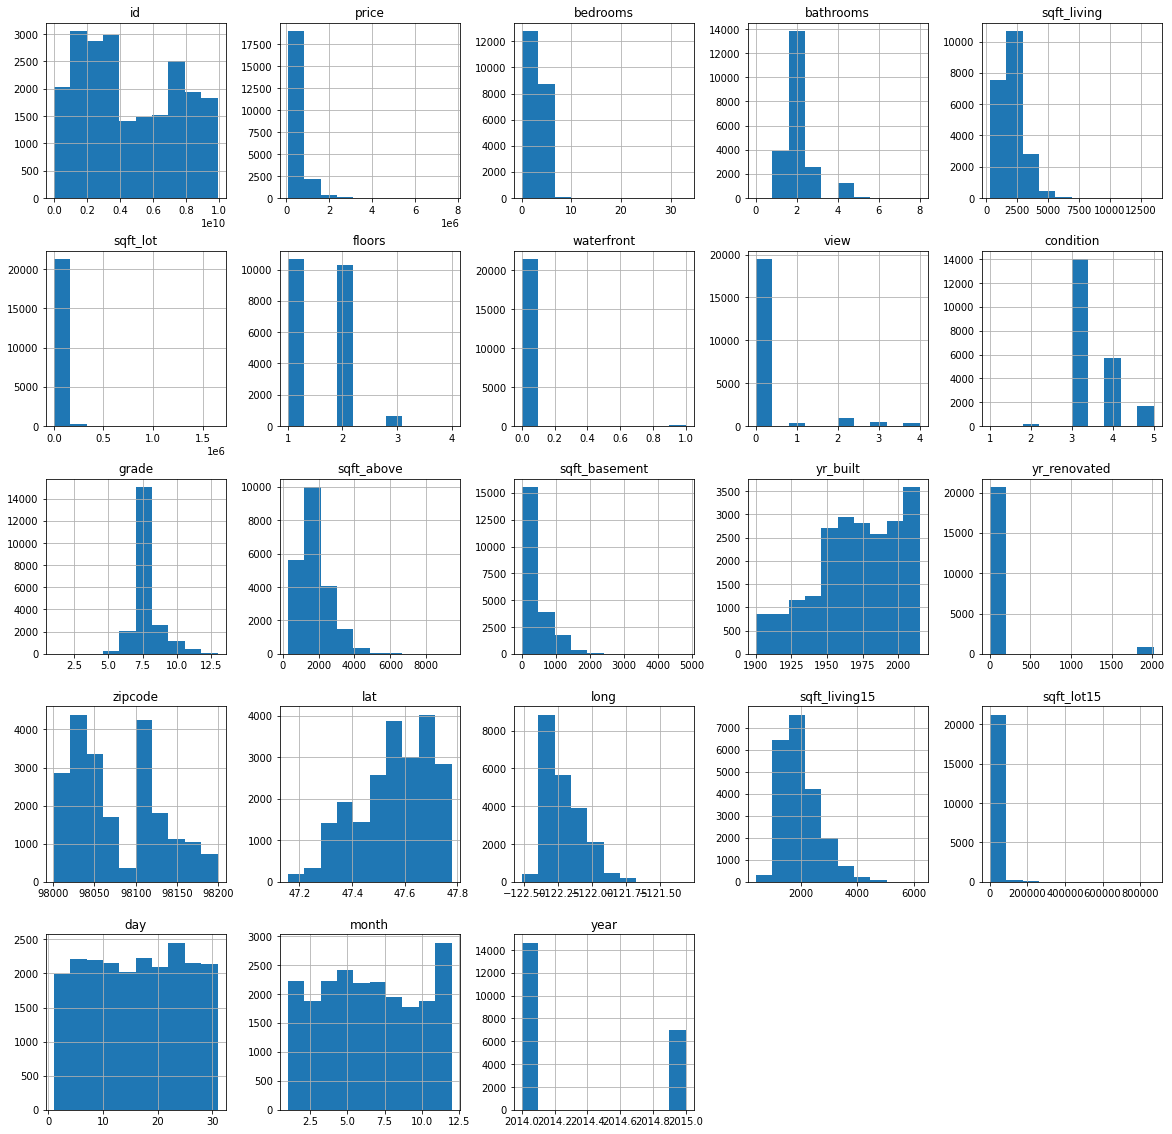

In [ ]:
df.hist(figsize = (20, 20));

## 2.4. Greater the number of bedrooms greater the price (FALSE)
 
The price increases until 8 bedrooms and starts decreasing

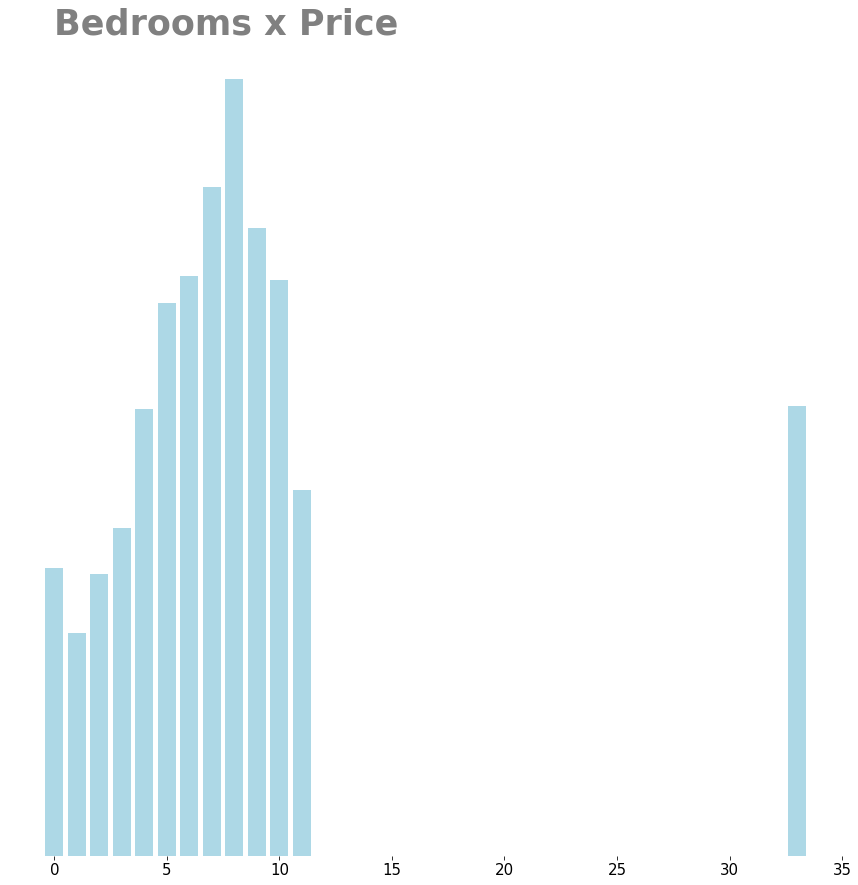

In [ ]:
bedrooms = df.groupby("bedrooms")["price"].mean()
plt.figure(figsize = (15, 15))
ax = plt.subplot()
ax.bar(x = bedrooms.index, height = bedrooms.values, color = "lightblue")
bar_config()
plt.gca().axes.get_yaxis().set_visible(False)      
plt.text(s = "Bedrooms x Price", x = 0, y = 1170000, weight = "bold", color = "gray", fontsize = 35);

## 2.5. Greater the number of bathrooms greater the price (TRUE)

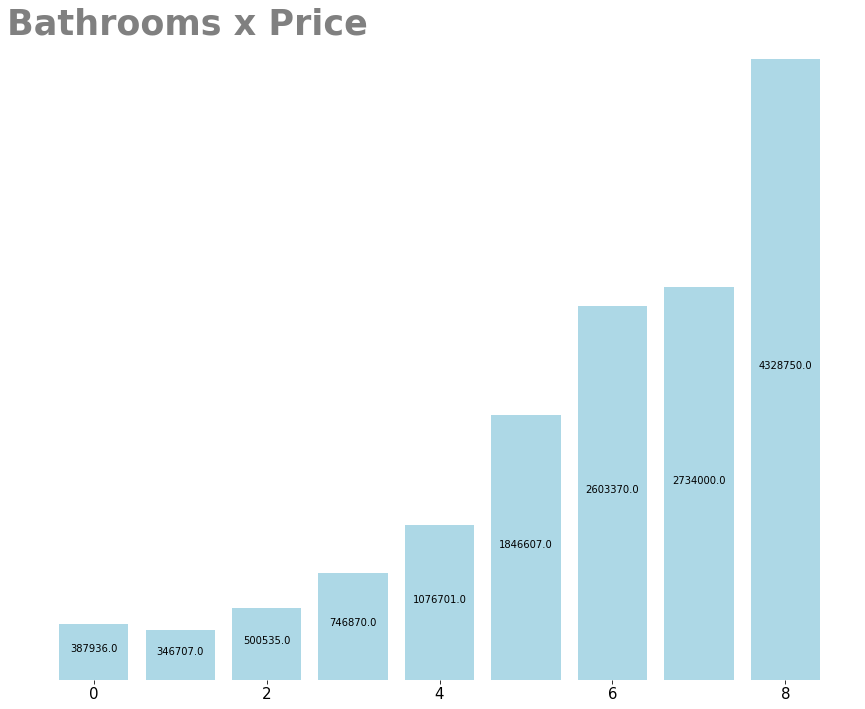

In [ ]:
bathrooms = df.groupby("bathrooms")["price"].mean()
plt.figure(figsize = (15, 12))
ax = plt.subplot(111)
ax.bar(x = bathrooms.index, height = bathrooms.values, color = "lightblue")
bar_config()
addlabels(bathrooms.index, np.round(bathrooms.values))
plt.gca().axes.get_yaxis().set_visible(False)       
plt.text(s = "Bathrooms x Price", x = -1, y = 4500000, weight = "bold", color = "gray", fontsize = 35);

## 2.6. Greater the square feet living greater the price (TRUE)

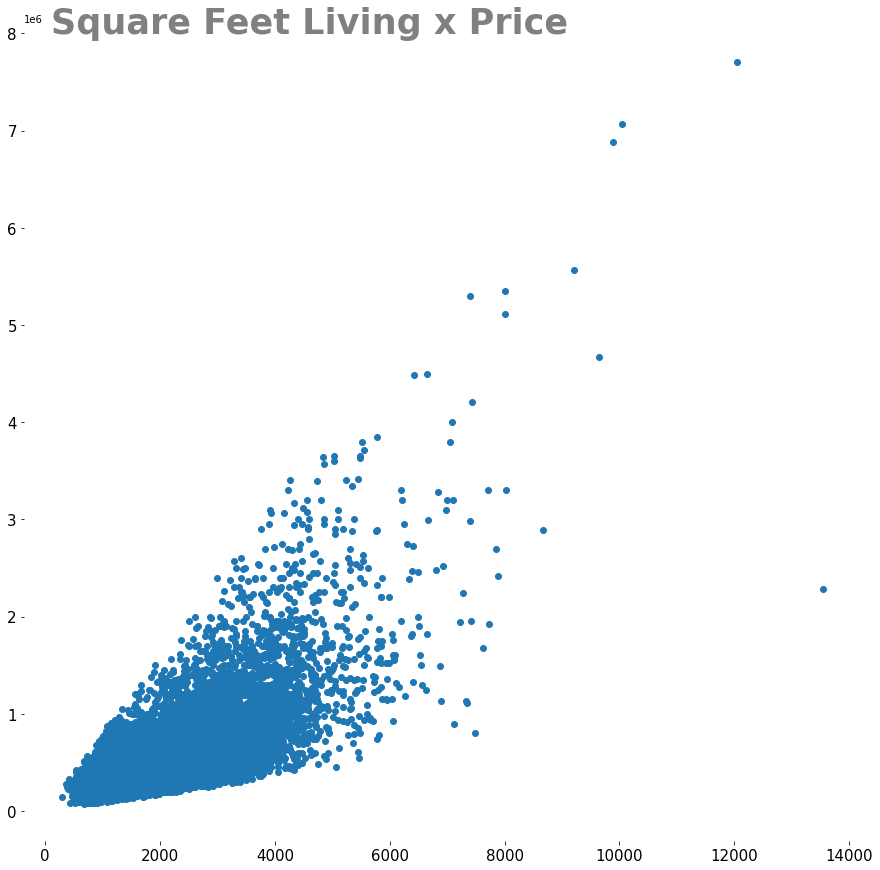

In [ ]:
 
plt.figure(figsize = (15, 15))
ax = plt.subplot()
ax.scatter(x = df.sqft_living, y = df.price);
bar_config()
plt.text(s =  "Square Feet Living x Price", x = 100, y = 8000000, weight = "bold", color = "gray", fontsize = 35);

In [ ]:
df[["sqft_living", "price"]].corr(method = "pearson")

,sqft_living,price
sqft_living,1.00000,0.70204
price,0.70204,1.00000


## 2.7. Greater the square feet lot greater the price (FALSE)

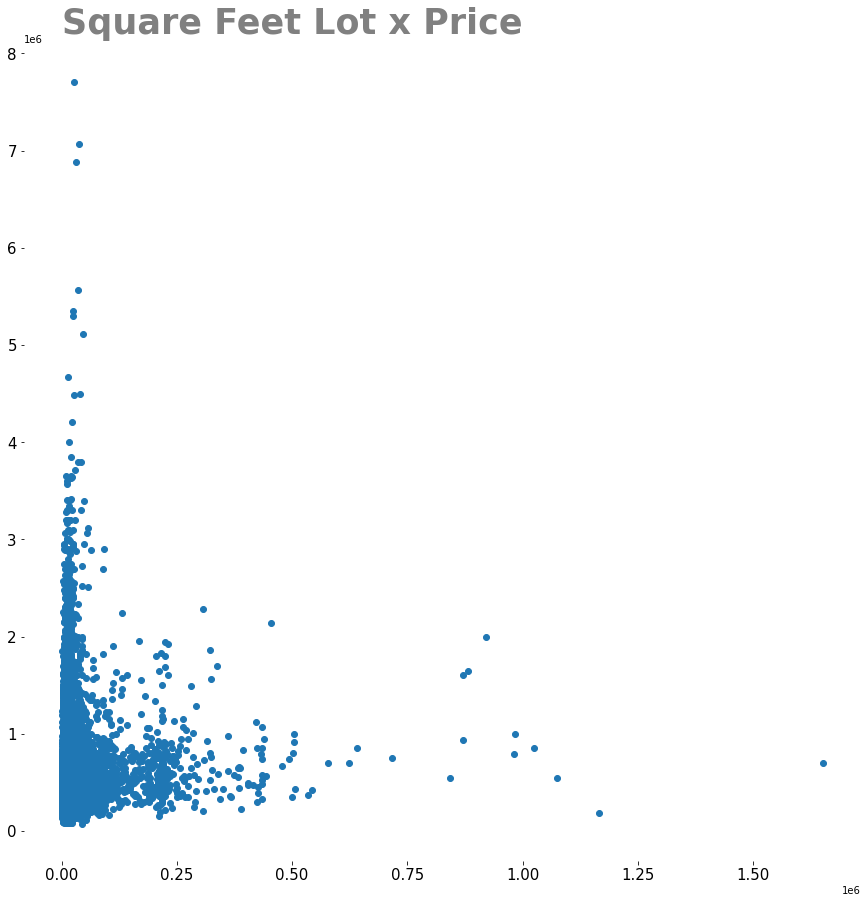

In [ ]:
plt.figure(figsize = (15, 15))
ax = plt.subplot()
ax.scatter(x = df.sqft_lot, y = df.price)
bar_config()
plt.text(s = "Square Feet Lot x Price", x = 0, y = 8200000, weight = "bold", fontsize = 35, color = "gray");

In [ ]:
df[["sqft_lot", "price"]].corr(method = "pearson")

,sqft_lot,price
sqft_lot,1.00000,0.08966
price,0.08966,1.00000


## 2.8. Waterfront houses are more expansive (TRUE)

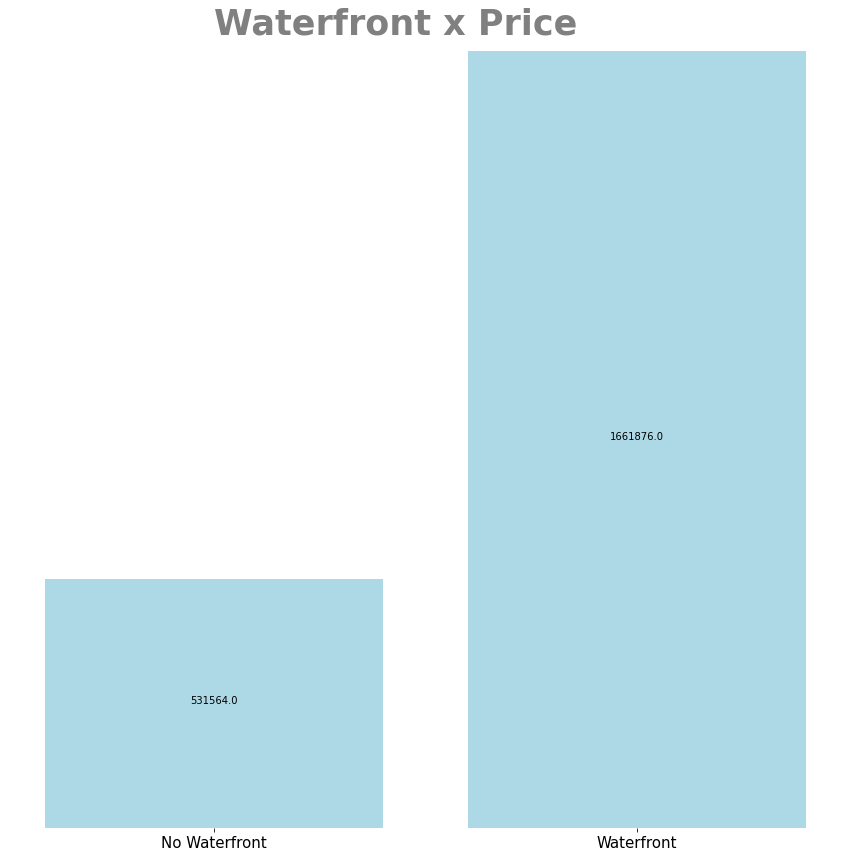

In [ ]:
plt.figure(figsize = (15, 15))
wt_houses = df.groupby("waterfront")["price"].mean()
ax = plt.subplot()
ax.bar(color = "lightblue", height = wt_houses.values, x = ["No Waterfront", "Waterfront"])
bar_config()
plt.gca().axes.get_yaxis().set_visible(False)
addlabels(wt_houses.index, np.round(wt_houses.values))
plt.text(s = "Waterfront x Price", x = 0, y = 1700000, weight = "bold", fontsize = 35, color = "gray");

## 2.9. Greater the number of floors greater the price (False)

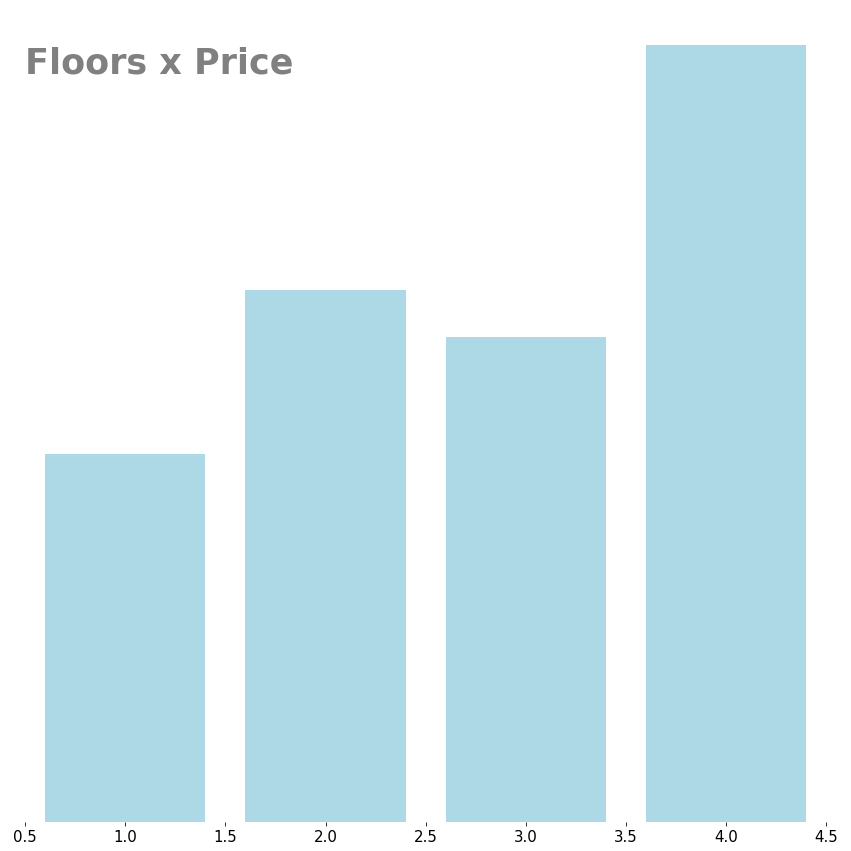

In [ ]:
plt.figure(figsize = (15, 15))
floors = df.groupby("floors")["price"].mean()
ax = plt.subplot()
ax.bar(height = floors.values, x = floors.index, color = "lightblue")
bar_config()
plt.gca().axes.get_yaxis().set_visible(False)
plt.text(s = "Floors x Price", x = .5, y = 900000, weight = "bold", color = "gray", fontsize = 35);

## 2.10. Houses with basement are more expensive (TRUE)

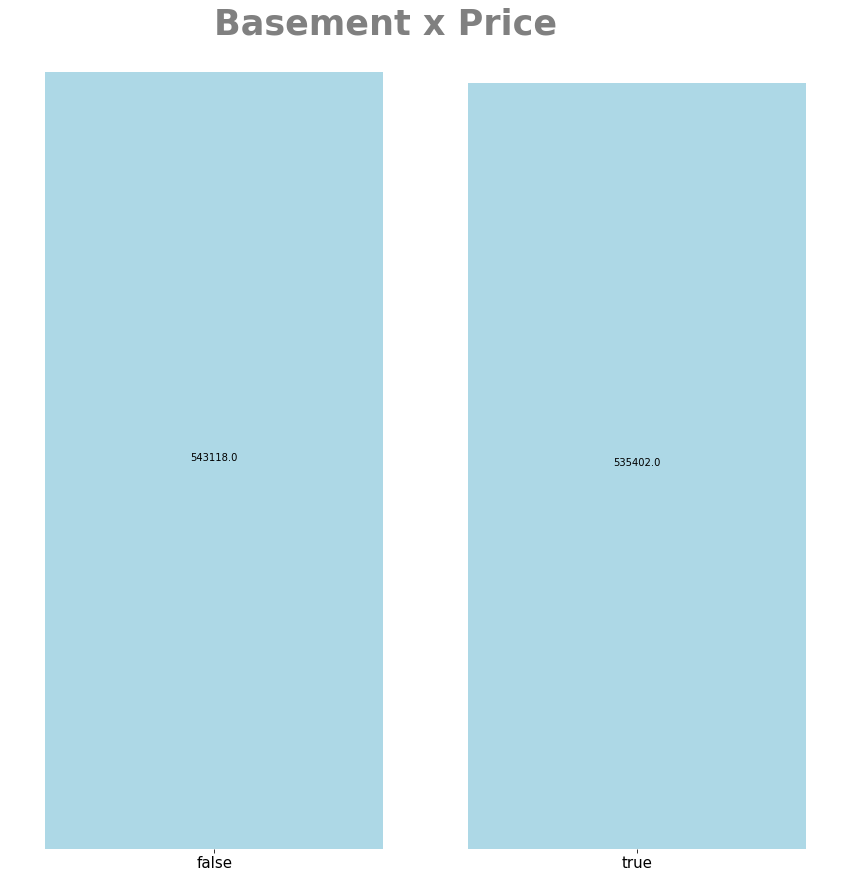

In [ ]:
 
plt.figure(figsize = (15, 15))
bt_houses = df.groupby("basement")["price"].mean()
ax = plt.subplot()
ax.bar(height = bt_houses.values, x = bt_houses.index, color = "lightblue")
bar_config()
plt.gca().axes.get_yaxis().set_visible(False)
addlabels(bt_houses.index, np.round(bt_houses.values))
plt.text(s = "Basement x Price", x = 0, y = 570000, weight = "bold", fontsize = 35, color = "gray");

## 2.11. Houses are more expansive than studios and apartments (FALSE)

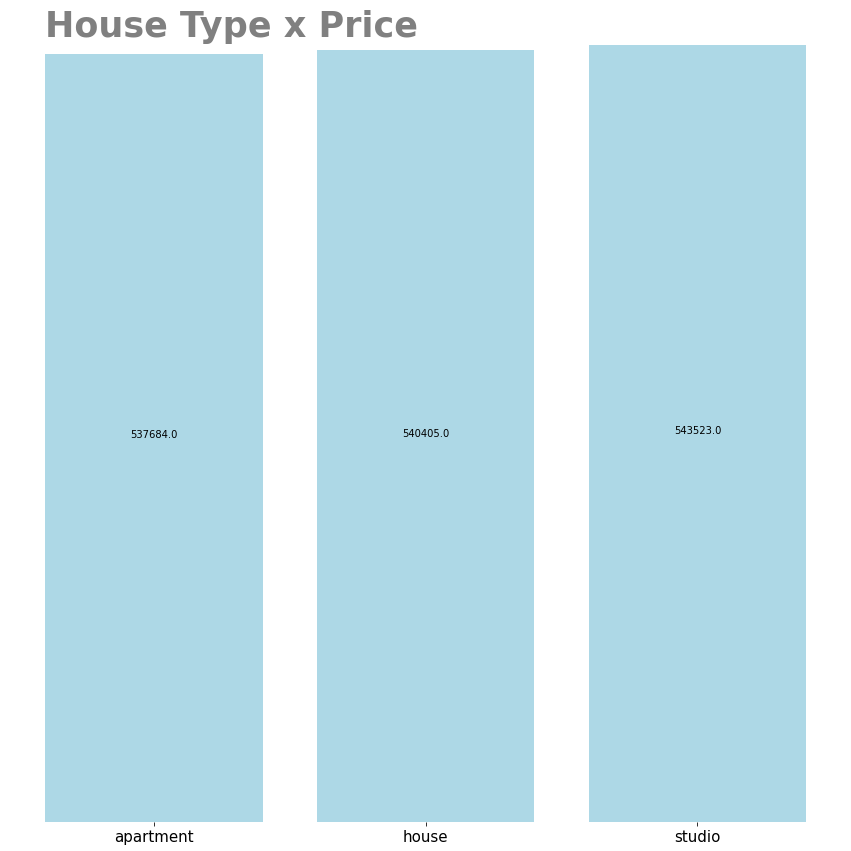

In [ ]:
plt.figure(figsize = (15, 15))
houses_tp = df.groupby("house_type")["price"].mean()
ax = plt.subplot()
ax.bar(height = houses_tp.values, x = houses_tp.index, color = "lightblue")
bar_config()
plt.gca().axes.get_yaxis().set_visible(False)
addlabels(houses_tp.index, np.round(houses_tp.values))
plt.text(s = "House Type x Price", x = -.4, y = 550000, weight = "bold", fontsize = 35, color = "gray");

## 2.12. Renovated houses are more expansive (FALSE)

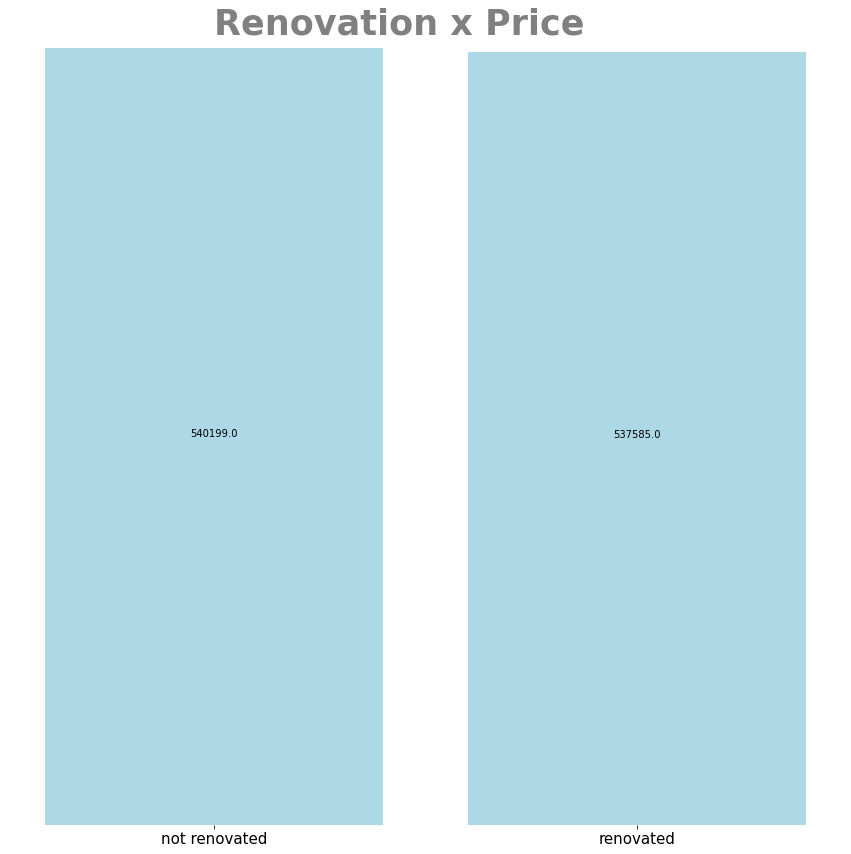

In [ ]:
plt.figure(figsize = (15,15))
rn_houses = df.groupby("renovated")["price"].mean()
ax = plt.subplot()
ax.bar(height = rn_houses.values, x = rn_houses.index, color = "lightblue")
bar_config()
plt.gca().axes.get_yaxis().set_visible(False)
addlabels(rn_houses.index, np.round(rn_houses.values))
plt.text(s = "Renovation x Price", x = 0, y = 550000, weight = "bold", fontsize = 35, color = "gray");

## 2.13. Older houses are cheaper (FALSE)

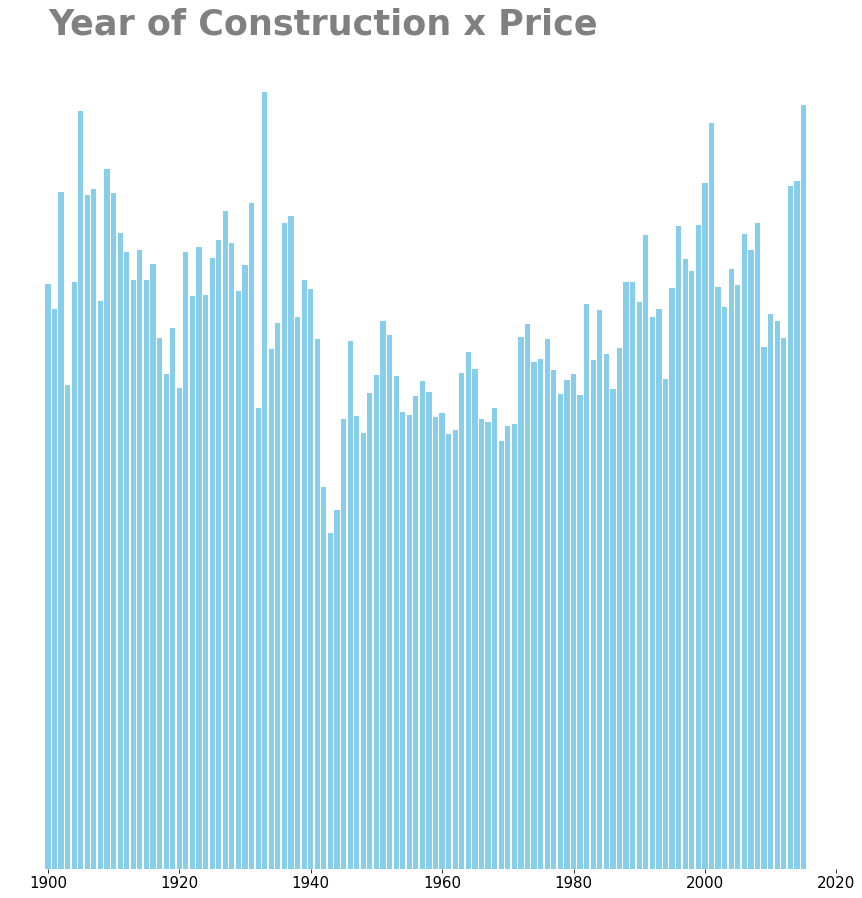

In [ ]:
plt.figure(figsize = (15, 15))
yrs_built = df.groupby("yr_built")["price"].mean()
ax = plt.subplot()
ax.bar(color = "skyblue", height = yrs_built.values, x = yrs_built.index)
bar_config()
plt.gca().axes.get_yaxis().set_visible(False)
plt.text(s = "Year of Construction x Price", x = 1900, y = 830000, weight = "bold", fontsize = 35, color = "gray");

## 2.14. Prices do not change over days (TRUE)

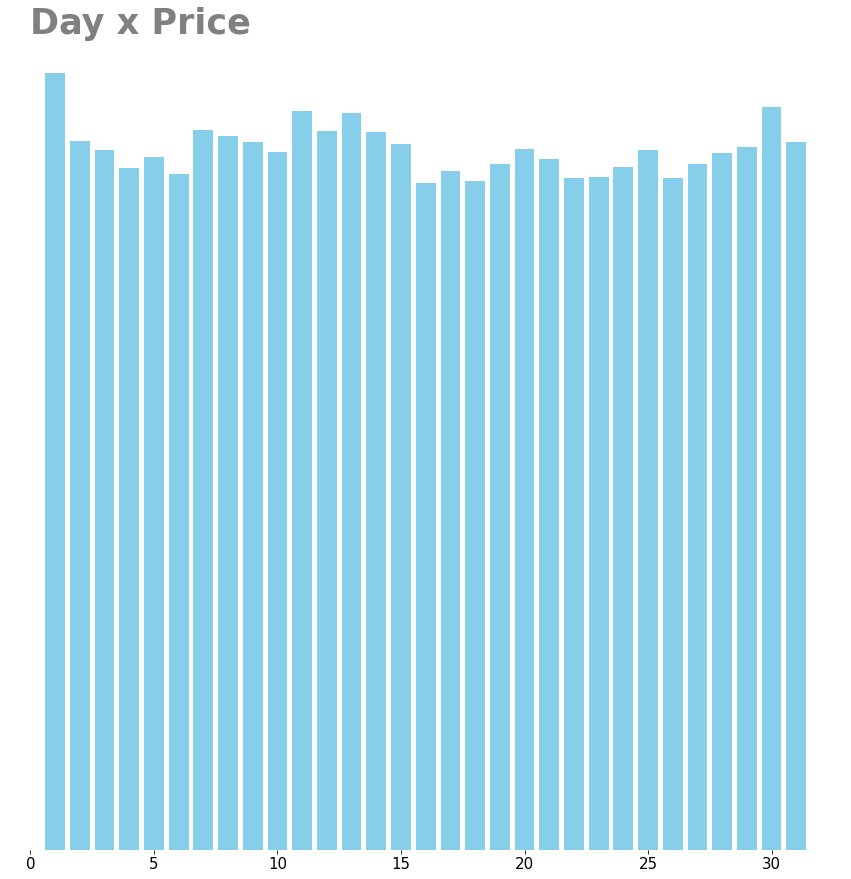

In [ ]:
 
plt.figure(figsize = (15, 15))
days = df.groupby("day")["price"].mean()
ax = plt.subplot()
ax.bar(color = "skyblue", height = days.values, x = days.index)
bar_config()
plt.gca().axes.get_yaxis().set_visible(False)
plt.text(s = "Day x Price", x = 0, y = 630000, weight = "bold", fontsize = 35, color = "gray");

## 2.15.  Prices change over months (FALSE)

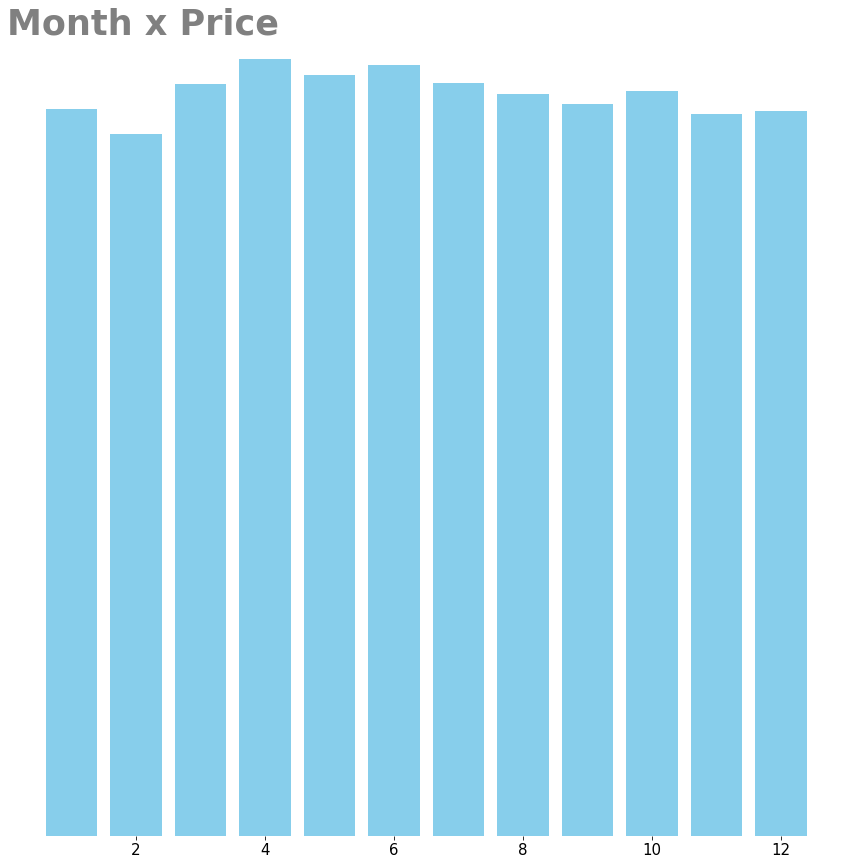

In [ ]:
 
plt.figure(figsize = (15, 15))
months = df.groupby("month")["price"].mean()
ax = plt.subplot()
ax.bar(color = "skyblue", height = months.values, x = months.index)
bar_config()
plt.gca().axes.get_yaxis().set_visible(False)
plt.text(s = "Month x Price", x = 0, y = 580000, weight = "bold", fontsize = 35, color = "gray");

## 2.16. Prices do not change over years (TRUE)

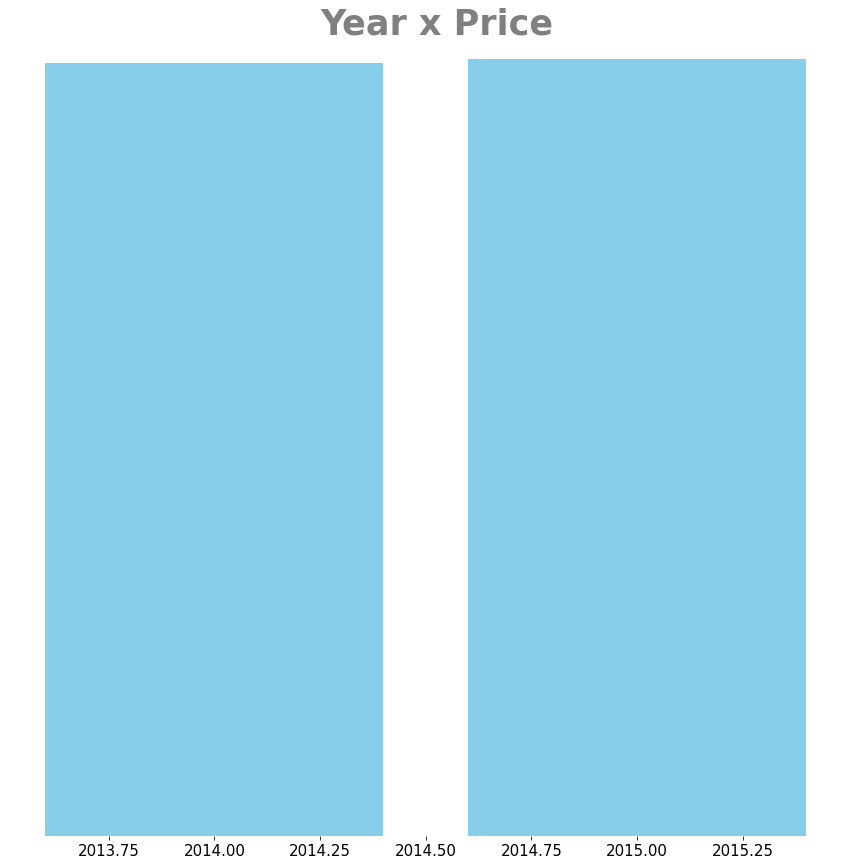

In [ ]:
plt.figure(figsize = (15, 15))
years = df.groupby("year")["price"].mean()
ax = plt.subplot()
ax.bar(color = "skyblue", height = years.values, x = years.index)
bar_config()
plt.gca().axes.get_yaxis().set_visible(False)
plt.text(s = "Year x Price", x = 2014.25, y = 560000, weight = "bold", fontsize = 35, color = "gray");

## 2.17. Houses in the center are more expansive (TRUE)

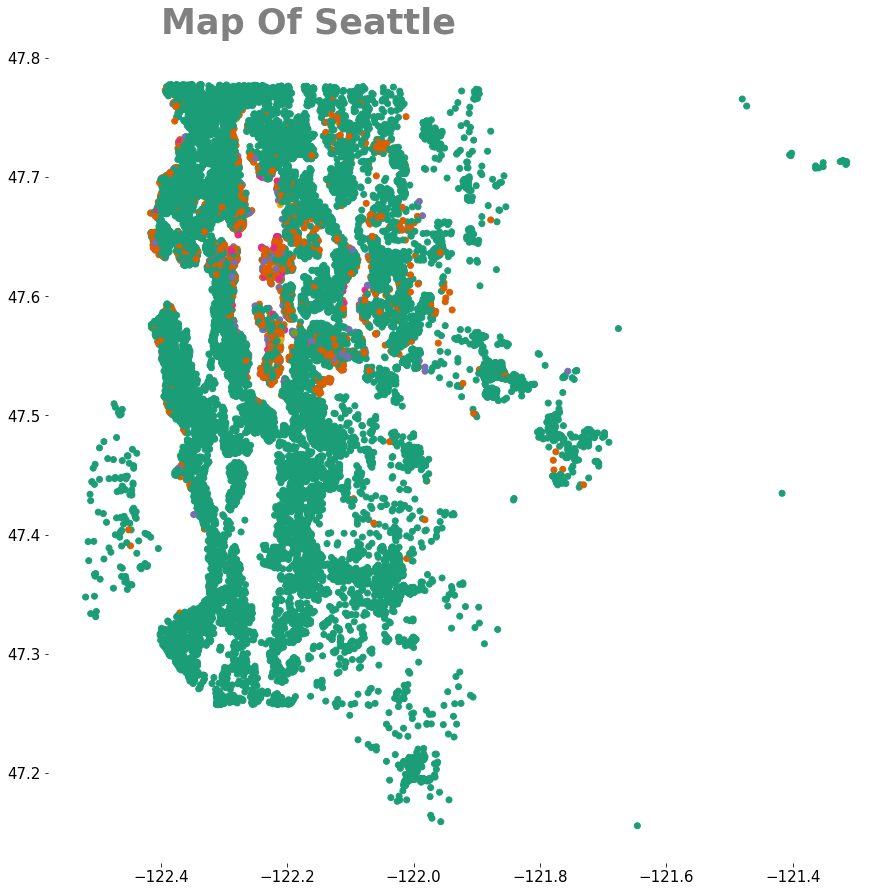

In [ ]:
plt.figure(figsize = (15, 15))
ax = plt.subplot()
ax.scatter(y = df.lat, x = df.long, c = df.price, cmap = "Dark2")
bar_config()
plt.text(s = "Map Of Seattle", x = -122.4, y = 47.82, weight = "bold", color = "gray", fontsize = 35);

# 3.0. Machine Learning Model

This part is focused on modelling data and training a machine learning model

In [ ]:
df1 = df.drop(["id", "date", "year", "month", "day", "zipcode", "basement", "house_type", "renovated"], axis = 1).copy()
x, y = df1.drop("price", axis = 1).copy(), df1["price"].copy()

In [ ]:
normalizer = MinMaxScaler().fit(x)
norm_x = normalizer.fit_transform(x)

## 3.1. Testing algorithms

### 3.1.1. Linear Regression

In [ ]:
lr = LinearRegression()
cross_validation(lr)

126292.41256428418

### 3.1.2. K-Nearest Neighbors

In [ ]:
knn = KNeighborsRegressor()
cross_validation(knn)

86550.52825197294

### 3.1.3. Decision Tree

In [ ]:
dt = DecisionTreeRegressor(random_state = 1, min_samples_leaf = 9)
cross_validation(dt)

88088.189432926

### 3.1.4. Random Forest

In [ ]:
rf = RandomForestRegressor(random_state = 1, min_samples_leaf = 2, max_depth = i)
cross_validation(rf)

69421.62824715964

## 3.2. Retraining the best model (Random Forest)

In [ ]:
rf.fit(norm_x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=21612, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

## 3.3. Evaluation metric
 
It is a value that translates how good the model is and there are many metrics with different interpretations. The metric I am using is the MAE (Mean absolute error). How can we interpret it? It is the average error we can expect from predictions made using the model.
 
Probably you are thinking 68.000 is too high, but we need to consider the values of the target variable: Price. Its values are too high and 68.000 is very small in this context.
 
So, it is basically: we can expect an average error of $ 69.000 in every prediction.
 
## 3.4. Repeated Cross-Validation
 
Cross-validation is a resampling method that allows data scientists to evaluate Machine Learning models somehow the bias is not so strong. But there are even more robust methods, like the Repeated Cross-Validation, that runs Cross-Validation n times. 

By using these  we are sure the metric returned really represents how good our model perform.

## 3.5. Predicting Selling Price

In [ ]:
df["selling_price"] = rf.predict(norm_x)

# 4.0. Solutions

This section is focused on creating the tables proposed in the Strategy

In [ ]:
df["profit"] = (df["selling_price"] - df["price"])

In [ ]:
rows_to_exclude = []
 
for i in range(df.shape[0]):
   if df["profit"][i] <= -50000:
      rows_to_exclude.append(i)
   else:
      pass

In [ ]:
df2 = df.drop(rows_to_exclude).copy()

In [ ]:
df2.reset_index(inplace = True)

In [ ]:
reform = []
 
for i in range(df2.shape[0]):
   if df2["profit"][i] <= 0:
      reform.append("probably")
   else:
      reform.append("probably not")

In [ ]:
df2["reform"] = reform

## 4.1. Table_1: Houses to buy

In [ ]:
houses_to_buy = df2[["id", "price"]].copy()
houses_to_buy.to_csv("houses_to_buy")
houses_to_buy

,id,price
0,5561000190,437500.00000
1,472000620,790000.00000
2,1024069009,675000.00000
3,7853361370,555000.00000
4,5056500260,440000.00000
...,...,...
19964,6752600320,360000.00000
19965,1422700040,183000.00000
19966,8730000270,359000.00000
19967,7923600250,450000.00000


## 4.2. Table_2: Selling prices

In [ ]:
selling_prices = df2[["id", "selling_price"]].copy()
selling_prices.to_csv("selling_prices")
selling_prices

,id,selling_price
0,5561000190,466264.23810
1,472000620,861823.46238
2,1024069009,668019.88924
3,7853361370,549532.69423
4,5056500260,475444.28202
...,...,...
19964,6752600320,335230.80083
19965,1422700040,199155.00881
19966,8730000270,359229.72778
19967,7923600250,480681.16976


## 4.3. Table_3: Houses that need a reform

In [ ]:
houses_that_need_reform = df2[["id", "reform"]].copy()
houses_that_need_reform.to_csv("houses_that_need_reform")
houses_that_need_reform

,id,reform
0,5561000190,probably not
1,472000620,probably not
2,1024069009,probably
3,7853361370,probably
4,5056500260,probably not
...,...,...
19964,6752600320,probably
19965,1422700040,probably not
19966,8730000270,probably not
19967,7923600250,probably not


## 4.4. Table_4: Attribute's importances

In [ ]:
dict_obj = {
"column": x.columns,
"importance(%)": rf.feature_importances_
}
 
importances = pd.DataFrame(dict_obj).sort_values(by = "importance(%)", ascending = False)
importances

,column,importance(%)
8,grade,0.33094
2,sqft_living,0.26285
13,lat,0.16631
14,long,0.07488
15,sqft_living15,0.03316
5,waterfront,0.03061
11,yr_built,0.02440
9,sqft_above,0.02145
3,sqft_lot,0.01449
16,sqft_lot15,0.01378


## 4.5. Total profit

In [ ]:
df2[df2.profit > 0]["profit"].sum()

323532923.46984947

 # **$323.532.923**

# 5.0. End notes
 
The CEO now knows what houses to buy and sell and at what price. He knows the houses that need to be renovated and what attributes most influence the price. All this because of data science.

# **That's All**